In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [65]:
df = pd.read_csv('combined_dataset.csv')
df.info()

#print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              26 non-null     int64  
 1   station_complex_id      26 non-null     int64  
 2   station_complex         26 non-null     object 
 3   borough                 26 non-null     object 
 4   ridership_full_metro    26 non-null     float64
 5   ridership_fair          26 non-null     float64
 6   ridership_metro         26 non-null     float64
 7   ridership_senior        26 non-null     float64
 8   ridership_student       26 non-null     float64
 9   ridership_unlimited     26 non-null     float64
 10  ridership_unlimited_7d  26 non-null     float64
 11  ridership_full          26 non-null     float64
 12  ridership_other         26 non-null     float64
 13  ridership               26 non-null     float64
 14  total_ridership         26 non-null     floa

In [66]:
sc=StandardScaler()
df.iloc[:,4:] = df.iloc[:,4:].astype('float32')
df.iloc[:,4:]= sc.fit_transform(df.iloc[:,4:])


C:\Users\steve\AppData\Local\Temp\ipykernel_18624\242632112.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.0
1      3.0
2      0.0
3      0.0
4      0.0
5      6.0
6      2.0
7      0.0
8     12.0
9      5.0
10     2.0
11     0.0
12     6.0
13     1.0
14     0.0
15    23.0
16    13.0
17     0.0
18    23.0
19     1.0
20     0.0
21     0.0
22     0.0
23    38.0
24     0.0
25     0.0
Name: a_teen, dtype: float32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,4:] = df.iloc[:,4:].astype('float32')
C:\Users\steve\AppData\Local\Temp\ipykernel_18624\242632112.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      15.0
1     143.0
2       3.0
3       2.0
4       2.0
5     101.0
6     104.0
7       3.0
8     176.0
9      49.0
10    125.0
11      0.0
12    101.0
13     73.0
14      0.0

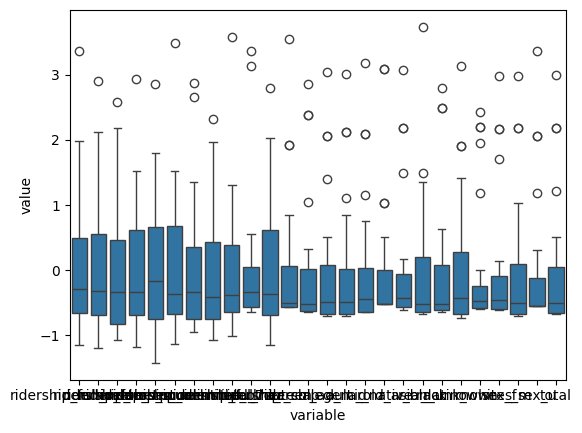

In [67]:
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,4:]))

plt.show()

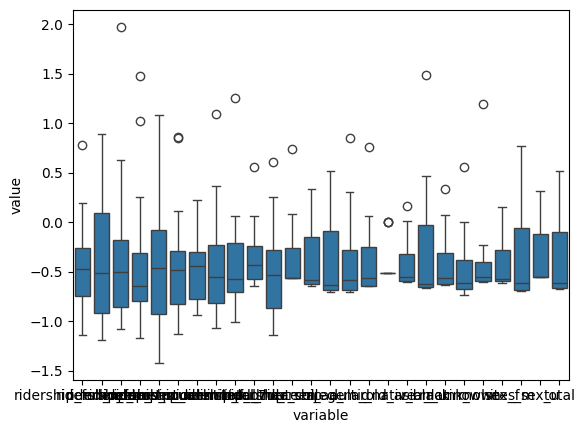

,Unnamed: 0,station_complex_id,station_complex,borough,ridership_full_metro,ridership_fair,ridership_metro,ridership_senior,ridership_student,ridership_unlimited,...,r_native,r_asian,r_black,r_latino,r_unknown,r_white,sex_f,s_m,sex_u,total
1,1,125,Morgan Av (L),Brooklyn,-0.449945,-0.544726,-0.426707,-0.938212,-0.789247,-0.139332,...,-0.515079,0.167735,-0.148736,-0.248996,0.554546,1.191431,0.148732,0.142544,-0.117238,0.143812
2,2,296,Marble Hill-225 St (1),Manhattan,-0.325713,0.349128,-0.576889,-0.293906,-0.065325,-0.491776,...,-0.515079,-0.603439,-0.648292,-0.609418,-0.672535,-0.592156,-0.588195,-0.679631,-0.552693,-0.659589
3,3,84,85 St-Forest Pkwy (J),Queens,-0.511005,-0.549768,-0.760535,-0.605733,-0.153269,-0.687304,...,0.000000,-0.550254,-0.654169,-0.559233,-0.611181,-0.592156,-0.559010,-0.654177,-0.552693,-0.633124
4,4,81,111 St (J),Queens,-0.892478,-1.136865,-1.075031,-1.002267,-0.766370,-1.050430,...,-0.515079,-0.576846,-0.665923,-0.623105,-0.672535,-0.583743,-0.595491,-0.687267,-0.552693,-0.667150
5,5,432,"Prospect Av (2,5)",Bronx,-0.115877,0.890767,0.625143,-0.480114,0.728134,-0.425562,...,-0.515079,-0.284332,0.198014,0.074927,-0.058994,-0.398654,-0.135824,0.022909,-0.117238,-0.018758
6,6,243,"Church Av (F,G)",Brooklyn,0.775029,0.621011,1.974438,1.025123,1.078780,0.855820,...,-0.515079,0.008182,0.462484,-0.134939,-0.549827,-0.230391,-0.019083,0.038182,-0.117238,0.022830
7,7,131,Bushwick Av-Aberdeen St (L),Brooklyn,-1.140255,-1.044688,-0.986980,-1.173144,-1.024006,-0.951428,...,-0.515079,-0.603439,-0.660046,-0.632229,-0.733889,-0.541677,-0.580898,-0.687267,-0.552693,-0.663370
8,8,444,Gun Hill Rd (5),Bronx,-0.257356,-0.310003,-0.255551,-0.369409,-0.300660,-0.622774,...,-0.515079,-0.257740,1.485104,0.339540,0.002360,-0.365001,-0.230676,0.773812,0.318217,0.516213
9,9,183,Rockaway Av (C),Brooklyn,-0.516807,-0.113963,-0.104218,-0.621088,0.013045,-0.470953,...,0.000000,-0.470478,0.009946,-0.481674,-0.427118,-0.449133,-0.420380,-0.313088,-0.552693,-0.343899
11,11,193,104 St (A),Queens,-0.973846,-1.187838,-1.031634,-1.041569,-1.100214,-1.133611,...,-0.515079,-0.603439,-0.665923,-0.632229,-0.733889,-0.600569,-0.610084,-0.697449,-0.552693,-0.678492


In [68]:
#removing outliers
df = df[df.iloc[:,4:].apply(lambda x: x.between(-2, 2)).all(axis=1)]


sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,4:]))

plt.show()

df


In [69]:
#encoding
df_bor = df.loc[:,['borough']]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

df_bor_encoded_raw = encoder.fit_transform(df_bor)
df_bor_encoded = pd.DataFrame(df_bor_encoded_raw, columns=encoder.get_feature_names_out(['borough']))


In [70]:

df
df_bor


,borough
1,Brooklyn
2,Manhattan
3,Queens
4,Queens
5,Bronx
6,Brooklyn
7,Brooklyn
8,Bronx
9,Brooklyn
11,Queens


In [71]:

df = pd.concat([df, df_bor_encoded], axis=1)
df = df.drop(columns=['borough'], axis=1)

print(df.index)
print(df_bor_encoded.index)


Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 14, 17, 19, 20, 21, 22, 25,
        0, 10, 13, 15, 16],
      dtype='int64')
RangeIndex(start=0, stop=18, step=1)


In [72]:
df_bor_encoded

,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0
